# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

#Данное исследвание будет разделено на несколько частей:

Часть 1 - Изучение общей информации;

Часть 2 - Предобработка данных;

Часть 3 - Сводные таблицы и дополнительные данные для исследования;

Часть 4 - Исследовательский анализ;

Часть 5 - общий вывод.

### Часть 1

#### 1.1 Загружаем необходимые для работы библиотеки

In [1]:
#версия питона - 3.1.5
import sys
!{sys.executable} -m pip install numpy 
import numpy as np
!{sys.executable} -m pip install pandas 
import pandas as pd
!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt

#### 1.2Подключение к Дата фрейму

In [2]:
pd.set_option('display.max_columns', None)

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#### 1.3 Просмотр предоставленных данных

##### 1.3.1 Пример данных

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


##### 1.3.2 Общая информация

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

##### 1.3.3 Информация по значениям

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


##### 1.3.4 Рассмотрим числовые значения методом describe()

In [7]:
data.describe().astype('int')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699,23699,23699,23699,14504,23613,21796,23699,21421,12180,18157,18180,18181,8079,18181,9110,20518
mean,9,6541548,60,2,2,10,34,5,10,1,28793,14191,0,490,0,517,180
std,5,10887013,35,1,1,6,22,4,5,1,12630,8608,0,342,0,277,219
min,0,12190,12,0,1,1,2,1,1,0,0,181,0,1,0,13,1
25%,6,3400000,40,1,2,5,18,2,7,0,18585,9238,0,288,0,294,45
50%,9,4650000,52,2,2,9,30,4,9,1,26726,13098,0,455,1,502,95
75%,14,6800000,69,3,2,16,42,8,12,2,37273,16293,1,612,1,729,232
max,50,763000000,900,19,100,60,409,33,112,5,84869,65968,3,3190,3,1344,1580


<div class="alert alert-info"> 

<b>1.3.4.1 Относительно этой части кода - у меня она работает и выводит требуемое
попробуйте запусить на версии kernel = 3.11.5 c pandas = 2.1.1</b></div>


##### 1.3.5 Гистограмма.

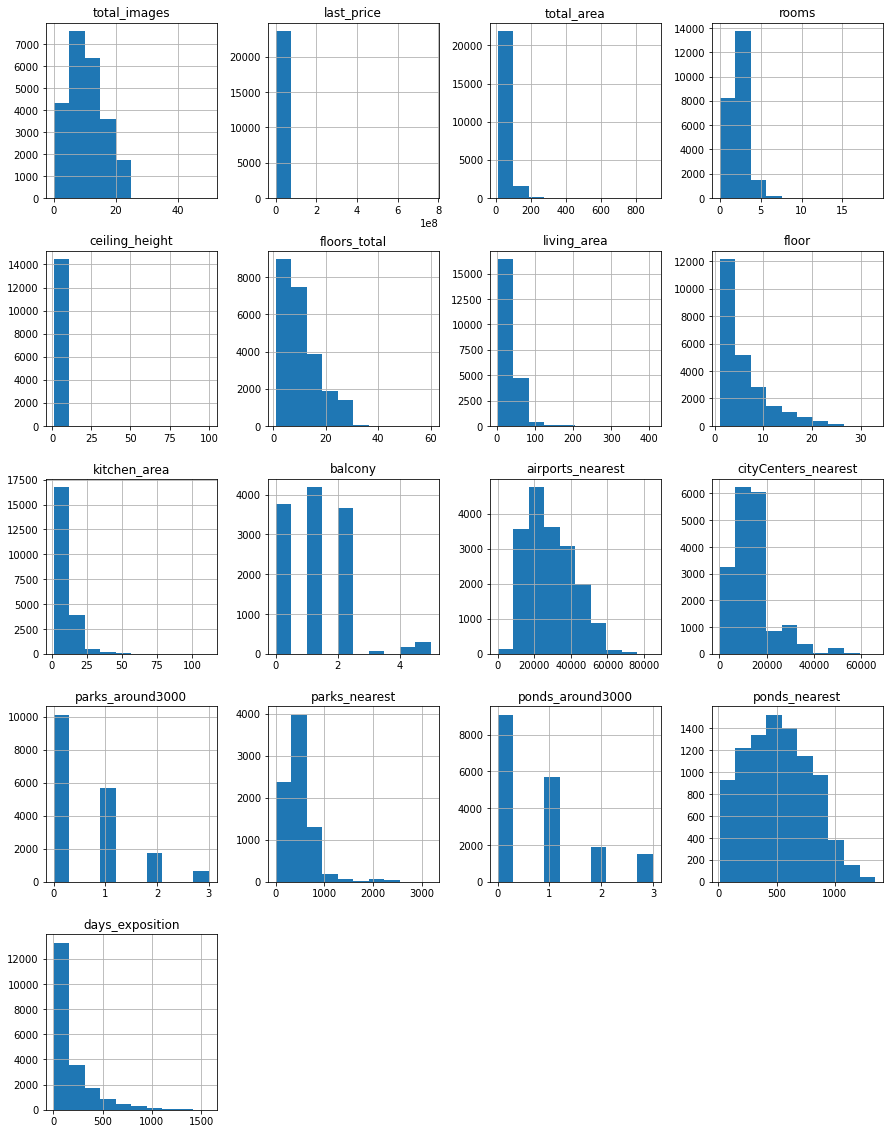

In [8]:
data.hist(figsize=(15, 20));

##### Вывод: на основе предоставленной нам информации можно увидеть, что основной массив работы будет заключаться в обработке нулевых значений и определении корректности значений ненулевых

### Часть 2. Предобработка данных

#### 2.1 Приведение "first_day_exposition" к единому формату даты

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


#### 2.2 Обработка нулевых значений "rooms"

##### 2.2.1 Посчитаем нулевые значения

In [10]:
data.query('rooms == 0')['rooms'].count()

197

In [11]:
data.query('rooms == 0').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25.0,17.50,21,NaN,True,False,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,NaN,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
780,9,2600000.0,26.10,2018-02-20,0,NaN,18.0,NaN,8,NaN,False,True,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14,0,2.70,5.0,15.00,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27,0,NaN,27.0,18.00,7,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0


Таким образом мы видим, что "rooms==0" -обозначение студий без кухни, следовательно дальнейшая обработка не требудется

#### 2.3 Работа с колонкой "ceiling_height"

##### 2.3.1 Найдем среднее значение и медиану высоты потолка

In [12]:
m_hight_1 = data.query('ceiling_height > 2 and ceiling_height < 8.3')['ceiling_height'].mean()
m_hight_1 = round(m_hight_1, 2)
m_hight_1

2.73

In [13]:
m_hight_2 = data['ceiling_height'].median()
m_hight_2

2.65

##### 2.3.2 Заполним нулевые и заменим выбросы медианным значением

In [14]:
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = 2.72
data.loc[(data['ceiling_height'] > 8.3) & (data['ceiling_height']/10 < 2.72), 'ceiling_height'] = 2.72
data.loc[(data['ceiling_height'] > 8.3) & (data['ceiling_height']/10 > 2.72), 'ceiling_height'] = data['ceiling_height']/10
data.loc[data['ceiling_height'] > 8.3, 'ceiling_height'] = 2.72
data.query('ceiling_height < 2 and ceiling_height > 8.3')['ceiling_height'].count()

0

In [15]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.72)
data['ceiling_height'].isna().sum()

0

#### 2.4 Обработка столбца "floor" и "floors_total"

In [16]:
data['floors_total'].isna().sum()

86

In [17]:
data['floor'].isna().sum()

0

In [18]:
data['floor'] = data['floor'].astype('int')

In [19]:
data.loc[data['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02,2,2.72,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23,1,2.72,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01,2,2.72,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06,3,2.72,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22,1,2.72,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13,2,2.72,NaN,NaN,4,NaN,False,False,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29,2,2.72,NaN,29.00,22,NaN,False,False,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21,1,2.72,NaN,19.40,15,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23,1,2.72,NaN,22.20,6,NaN,False,False,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27,2,2.72,NaN,32.00,12,NaN,False,False,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


In [20]:
data.query('airports_nearest == 39197.0	 and cityCenters_nearest == 12373.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,2.72,NaN,30.8,4,NaN,False,False,12.0,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
6173,19,6280000.0,42.6,2017-10-31,1,2.92,17.0,NaN,16,NaN,False,False,NaN,2.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,23.0
14896,3,5950000.0,45.0,2016-02-09,1,2.90,17.0,19.4,17,NaN,False,False,11.5,2.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,193.0
18811,10,9300000.0,58.0,2017-05-12,2,2.70,17.0,34.0,11,NaN,False,False,12.0,2.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,107.0


Как показывает вышеуказанный пример, обнаружить значение этажности многоквартирного дома возможно, следовательно мы можем заполнить пропущенные значения на основе значения квартир того же дома

Наиболее явный способ заполнения нулевых значений - сгруппировать data по близости к аэропорту и центру (т к у нас нет id домов), и заполненить пустые значения на основе данной группировки.

Оставшиеся нули прировняем к значению этажа

In [21]:
data['floors_total'] = data.groupby(['airports_nearest','cityCenters_nearest'])['floors_total'].transform('first').fillna(data['floor'])
data['floors_total'] = data['floors_total'].astype('int')

In [22]:
data['floors_total'].isna().sum()

0

#### 2.4 Обработка столбцов "living_area", "kitchen_area" & "total_area"

In [23]:
data.query('(living_area< kitchen_area)')['living_area'].count()

355

In [24]:
data.query('(living_area + kitchen_area) >= total_area')['living_area'].count()

134

In [25]:
data.query('living_area< 14')['living_area'].count()

322

Вышеописанные запросы говорят о следующих вещах:
1) 322 либо неправильно указаны в бд, либо застройщики нарушили "Семейное и жилищное право", 2019, NN 2, 3, где указано, что минимальная жилая площадь долна составлять 14 кв.м.
2) у нас есть 355 квартир, в которых жилплощадь меньше размера кухни
3) так же было обнаружены данные, в которых площадь кухни+ жилплощадь превышают размер квартиры. 

    Таким образом все незаполненные либо слишком маленькие жилые помещения мы можем прировнять к 14;

    Все пустые кухни и кухни менее 5 кв.м. приравняем к 5 на основе того же закона, исключая нулевые показатели: в таком случае кухня объединена с жилплощадью и отдельно прописывать её нет смысла;
    
    Общую площадь квартир, демонстрирующих цифры менее возможных, заменим на площадь жилплощади+площадь кухни+ средний размер нежилых помещений.

In [26]:
data.loc[data['living_area'] < 14, 'living_area'] = 14
data['living_area'] = data['living_area'].fillna(14)
data['living_area'].isna().sum()

0

In [27]:
data.loc[(data['kitchen_area'] < 5) & (data['kitchen_area'] != 0), 'kitchen_area'] = 5
data['kitchen_area'] = data['kitchen_area'].fillna(5)
data['kitchen_area'].isna().sum()

0

In [28]:
data_m_area = round(data['total_area'].mean()- (data['living_area'].mean()+data['kitchen_area'].mean()),2)
data_m_area

17.46

In [29]:
data.loc[data['total_area']< (data['living_area']+data['kitchen_area']), 'total_area'] = round(data['living_area']+data['kitchen_area']+data_m_area,2)
data['total_area'].isna().sum()

0

#### 2.5 Обработка столбца "balcony"

In [30]:
data['balcony'].isna().sum()

11519

Очевивдно, что не во всех квартирах есть балконы, следовательно достаточно заменить None на 0

In [31]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

In [32]:
data['balcony'] = data['balcony'].astype('int')

#### 2.6 Исследуем столбец "locality_name" на предмет уникальных значений

In [33]:
len(data['locality_name'].unique())

365

Для очистки от дубликатов приведём все значения к нижнему регистру

In [34]:
data['locality_name'] = data['locality_name'].str.lower()
len(data['locality_name'].unique())

365

Выполним замену ошибки в написании 'поселок' вместо 'посёлок':

In [35]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
len(data['locality_name'].unique())

331

Таким образом мы предотвратили различие в результатах, связанных с человеческим фактором возникновения ошибки.

#### 2.7 Обработка столбца "airports_nearest" и "cityCenters_nearest"

In [36]:
data['airports_nearest'].isna().sum()

5542

In [37]:
data['cityCenters_nearest'].isna().sum()

5519

In [38]:
data['parks_nearest'].isna().sum()

15620

In [39]:
data['ponds_nearest'].isna().sum()

14589

Уберем нулевые значения аналогично п. 2.4

In [40]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = data['airports_nearest'].mean()
data['airports_nearest'] = round(data.groupby(['airports_nearest','cityCenters_nearest'])['airports_nearest'].transform('first').fillna(data['airports_nearest'].mean()),2)
data['airports_nearest'].isna().sum()

0

In [41]:
data.loc[data['cityCenters_nearest'] == 0, 'cityCenters_nearest'] = data['cityCenters_nearest'].mean()
data['cityCenters_nearest'] = round(data.groupby(['airports_nearest','cityCenters_nearest'])['cityCenters_nearest'].transform('first').fillna(data['cityCenters_nearest'].mean()),2)
data['cityCenters_nearest'].isna().sum()

0

Проверим результат:

In [42]:
data['airports_nearest'].min()

6450.0

In [43]:
data['cityCenters_nearest'].min()

181.0

#### 2.8 Обработка столбцов "parks_around3000" и "ponds_around3000"

Поскольку поблизости могут как быть, так и не быть парки и озера в районе трех километров, достаточно заполнить None нулем

In [44]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [45]:
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

#### 2.9 Обработка столбцов "parks_nearest" и "ponds_nearest"

Обработаем по аналогии с п. 2.4, с условием: если поблизости нет парков или озер, аналогичное расстояние будет равно 0, иначе - расстояние до ближайшего парка/озера.

Если расстояние до парка/озера > 3000, тогда прировняем его к 3000.

In [46]:
data['parks_nearest'] = round(data.groupby(['airports_nearest','cityCenters_nearest'])['parks_nearest'].transform('first').fillna(data['parks_nearest'].mean()),2)
data.loc[data['parks_around3000'] == 0, 'parks_nearest'] = 0
data.loc[data['parks_nearest'] > 3000, 'parks_nearest'] = 3000
data['parks_nearest'].isna().sum()

0

In [47]:
data['ponds_nearest'] = round(data.groupby(['airports_nearest','cityCenters_nearest'])['ponds_nearest'].transform('first').fillna(data['ponds_nearest'].mean()),2)
data.loc[data['ponds_around3000'] == 0, 'ponds_nearest'] = 0
data.loc[data['ponds_nearest'] > 3000, 'ponds_nearest'] = 3000
data['ponds_nearest'].isna().sum()

0

Проверяем:

In [48]:
data.query('ponds_around3000 == 0 & ponds_nearest != 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [49]:
data.query('parks_around3000 == 0 & parks_nearest != 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### 2.10 Анализ столбца "days_exposition"

In [50]:
data['days_exposition'].agg(['min','max','median'])

min          1.0
max       1580.0
median      95.0
Name: days_exposition, dtype: float64

In [51]:
data['days_exposition'].isna().sum()

3181

Из приведённых выше данных можно сделать вывод, что объявления были размещены, но пропущенне значения в столбце "days_exposition" означают, что до сих пор объявление актульно и не снято с пуликации.

#### 2.11 Анализ столбцов "is_apartment", "studio", "open_plan"

In [52]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [53]:
data['studio'].unique()

array([False,  True])

In [54]:
data['open_plan'].unique()

array([False,  True])

На основе вышеописанного можно сказать следующее:
Указание, является ли квартира студией есть в всей таблице;
Наличие плана открытия аналогично указано в течение всей таблицы;
Однако указание на наличие жилплощади в некоторых строках упущено и для облегчения анализа мы можем заменить данные показатели на False

In [55]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].unique()

array([False,  True])

#### Проверка на явные дубликаты

In [56]:
DuplicateRows = data[data.duplicated(subset=data.columns[1:-1], keep=False)]
DuplicateRows

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Как мы можем увидеть - явных дубликатов в таблице нет
Столбцы с фото и днями я вырезал, т к они единственные, которые могут вызвать неявное дублирование на данный момент.

#### Вывод:
По результату проведённой обработки данных, можно сказать что довольно большая часть данных, которая может влиять на итоговую статистику, а так же на решение о прибретении квартир, потеряна при выгрузке таблицы либо отсутствует. Об этом обязательно необходимо сообщить ответственным сотрудникам по выгрузке и сбору данных.

### Часть 3 - Сводные таблицы и дополнительные данные для исследования;

#### 3.1 Посчитаем и добавим в таблицу цену квадратного метра

In [57]:
data['price_per_square_meter'] = data['last_price']/data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370
1,7,3350000.0,40.4,2018-12-04,1,2.72,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,0.0,0,0.0,81.0,82920
2,10,5196000.0,56.0,2015-08-20,2,2.72,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785
3,0,64900000.0,159.0,2015-07-24,3,2.72,14,14.0,9,False,False,False,5.0,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000


In [58]:
data['price_per_square_meter'].mean().round(1)

99172.4

##### Вывод:
При довольно сильном разбросе цен предложений квартир, средняя цена за кв.метр составляет 100 тыс.руб

#### 3.2 Посчитаем и добавим в таблицу день недели, месяц и год публикации объявления

In [59]:
data['day_of_week_exposition']= data['first_day_exposition'].dt.weekday
data['month_exposition']=data['first_day_exposition'].dt.month
data['years_exposition']=data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week_exposition,month_exposition,years_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.72,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,0.0,0,0.0,81.0,82920,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.72,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.72,14,14.0,9,False,False,False,5.0,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018


In [60]:
data['years_exposition'].value_counts()

2018    8519
2017    8190
2019    2879
2016    2783
2015    1191
2014     137
Name: years_exposition, dtype: int64

##### Вывод:
Очевидно, что количество предложений на рынке недвижимости было пиковым значением в 2017 и 2018 годах, а вот в 2019 количество предложений сократилось в 4 раза и вернулось на уровень 2016 года

#### 3.3 Добавим разделение по этажам: первый, последний или другой

In [61]:
last_floor = data.query('floors_total/floor == 1')
data['group'] = data['floor']
data['group'] = data['group'].astype('str')
data.loc[data['group'] == '1', 'group'] = 'Первый'
data.loc[last_floor.index, 'group'] = 'Последний'
data.loc[(data['group'] != 'Первый') & (data['group']!='Последний'), 'group'] = 'Другой'
data['group'].unique()

array(['Другой', 'Первый', 'Последний'], dtype=object)

##### Вывод:
Судя по количеству предложений, более актуальны квартиры на любом этаже кроме первого и последнего

#### 3.4 зависимость цены от разных факторов.

In [62]:
data.loc[:, 'cityCenters_nearest'] = round(data['cityCenters_nearest'] / 1000)
data['cityCenters_nearest']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695    14.0
23696    14.0
23697    10.0
23698    14.0
Name: cityCenters_nearest, Length: 23699, dtype: float64

#### Промежуточный вывод: 
По результату проведённого анализа нелья не заметить, что активные продажи жилья начались с 2017 года, а предложения первого и последнего этажей в сумме по количеству объявлений уступает любому другому больше чем в три раза от всего количества объявлений. В среднем жилая площадь предложенных квартир знимает всего половину от общей площади, в то время как площадь кухни доходит до 20% от общей площади. И при всём при этом средняя цена за кв.метр достигает 100 тыс.руб.

### Часть 4. Исследовательский анализ

##### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра

#### 4.1 Площадь

##### 4.1.1 Диаграмма размаха площади квартиры

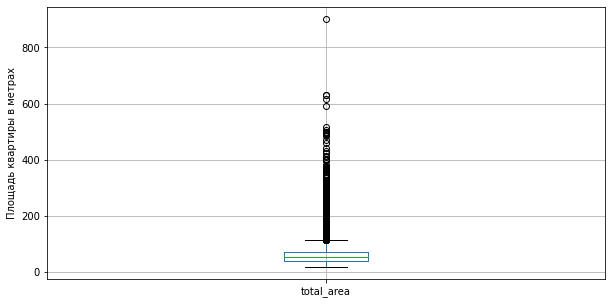

In [63]:

data.boxplot(column=['total_area'], figsize=(10,5), grid=True)
plt.ylabel('Площадь квартиры в метрах')
plt.show()

In [64]:
data['total_area'].describe()

count    23699.000000
mean        60.469403
std         35.617354
min         19.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Отсечём чрезмерно выбивающиеся значения согласно распределению данных ящика с усами: площадь свыше 100 кв.метров нам для дальнейшей статистики не интересна.

##### 4.1.2 Диаграмма размаха площади квартиры после отсечения выбивающихся значений

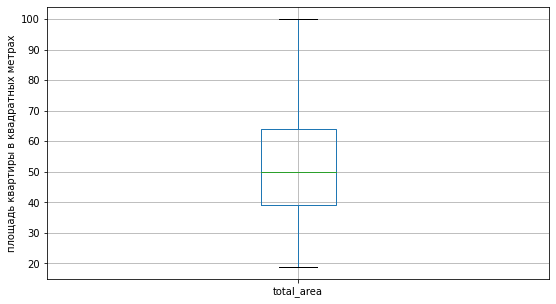

In [65]:
good_data = data.query('total_area < 100')
good_data.boxplot(column=['total_area'], figsize=(9,5), grid=True)
plt.ylabel('площадь квартиры в квадратных метрах')
plt.show()

##### 4.1.3 Гистограмма (Распределение предложений квартир по площади)

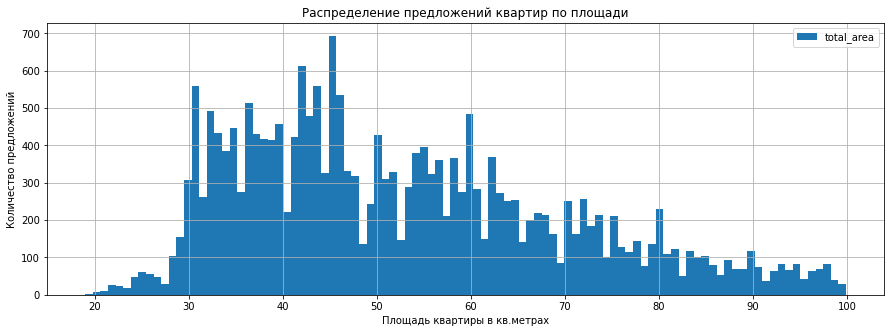

In [66]:
good_data.sort_values(by='total_area', ascending=True).plot(kind='hist', y='total_area',title='Распределение предложений квартир по площади',bins=100, figsize=(15,5), grid=True)

plt.xlabel('Площадь квартиры в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

##### 4.1.4 Корреляция Пирсона (Распределение предложений квартир по площади)

In [67]:
analysis_1=good_data[['total_area', 'living_area', 'kitchen_area']].reset_index(drop=True)
analysis_1.corr(method = 'pearson')

,total_area,living_area,kitchen_area
total_area,1.000000,0.812077,0.411041
living_area,0.812077,1.000000,0.179332
kitchen_area,0.411041,0.179332,1.000000


#### 4.2 Цена

##### 4.2.1 Диаграмма размаха цены предложений

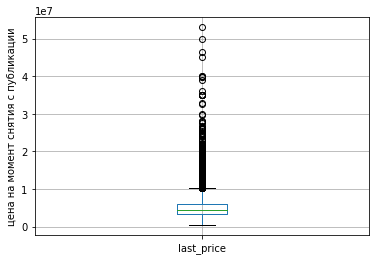

In [68]:
good_data.boxplot('last_price')
plt.ylabel('цена на момент снятия с публикации')
plt.show()

##### 4.2.2 Распределение предложений квартир по цене

Отбросим выбивающиеся значения по цене, т.к. они будут мешать при построении графика, а так же усложнят анализ и прочтение данных с гистограммы. Очевидно, что стоимость квартир свыше 9 млн. встречается редко в наших данных, отсечём лишнее.

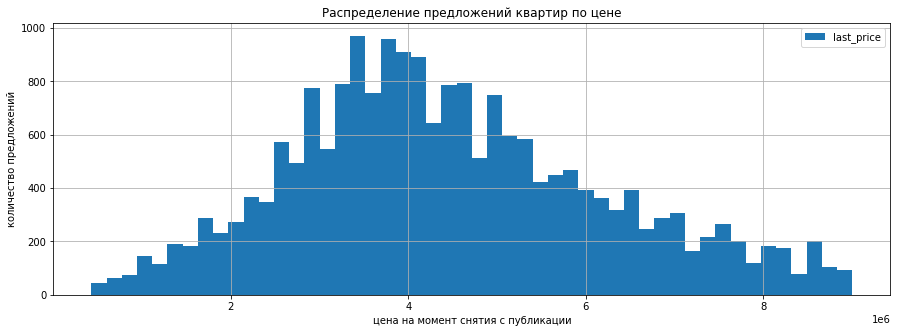

In [69]:
good_data = good_data.query('last_price < 9000000')
good_data.plot(kind='hist', y='last_price', title='Распределение предложений квартир по цене',grid=True, bins=50, figsize=(15,5))
plt.ylabel('количество предложений')
plt.xlabel('цена на момент снятия с публикации')
plt.show()

Из графика хорошо виден ценовой сегмент квартир в районе 4 млн.руб

#### 4.3 Число комнат

##### 4.3.1 Распределение предложений по количеству комнат

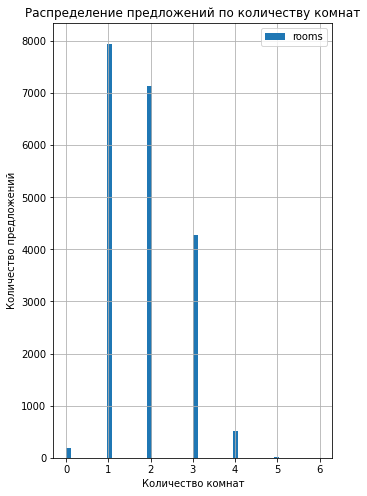

In [70]:
good_data.plot(kind='hist',y='rooms',title='Распределение предложений по количеству комнат',grid=True, bins=50, figsize=(5,8))
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()

Из графика видно преобладание квартир с 1-2 комнатами

#### 4.4 Высота потолков

##### 4.4.1 Диаграмма размаха высоты потолков

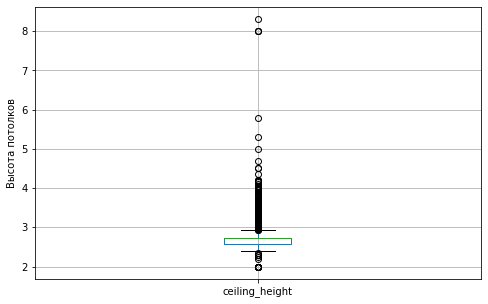

In [71]:
good_data.boxplot(column=['ceiling_height'], figsize=(8,5), grid=True)

plt.ylabel('Высота потолков')
plt.show()

##### 4.4.2 Распределение предложений по высоте потолков

Основываясь на графике "ящика с усами", отсечём квартиры с потолками свыше 2,9 метра, а так же ниже 2,4

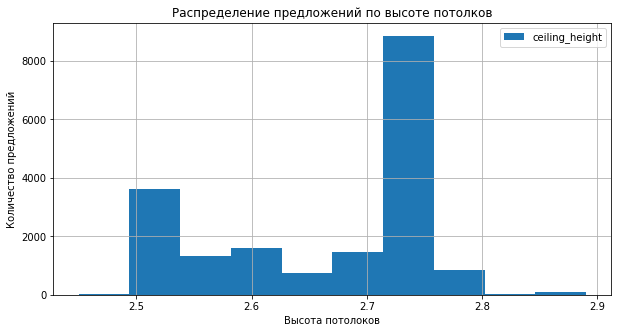

In [72]:
good_data = good_data.query('ceiling_height < 2.9 and ceiling_height > 2.4')
good_data.plot(kind='hist',y='ceiling_height',grid=True, bins=10, figsize=(10,5),title='Распределение предложений по высоте потолков')
plt.xlabel('Высота потолоков')
plt.ylabel('Количество предложений')
plt.show()

#### Корреляция и сравнение распределений

In [73]:
analysis_2=good_data[['locality_name','total_area', 'living_area', 'kitchen_area', 'last_price','rooms','ceiling_height']].reset_index(drop=True)
analysis_2.corr()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height
total_area,1.000000,0.809297,0.330209,0.609132,0.803369,0.070631
living_area,0.809297,1.000000,0.107464,0.438058,0.819762,-0.077041
kitchen_area,0.330209,0.107464,1.000000,0.392223,-0.022974,0.263194
last_price,0.609132,0.438058,0.392223,1.000000,0.380267,0.155429
rooms,0.803369,0.819762,-0.022974,0.380267,1.000000,-0.135261
ceiling_height,0.070631,-0.077041,0.263194,0.155429,-0.135261,1.000000


На выбранной нами корреляции мы видим, что прямой зависимости между указанными факторами нет, однако можно заметить, что наибольший кореляционный результат соответствует связи между комнатами и жилой площадью, на втором месте - между площадью и жилой площадью, а на третьем - между площадью и количеством комнат. 

Таким образом можно сделать выбор, что при выборе квартиры люди в первую очередь обращают внимание на её размер жилых помещений, затем на жилую площадь и площадь общую, в то время как цена вызывает интеречс только после того, как люди удовлетворены первыми тремя показателями. По остальным из указанных показателей можно сказать, что высота потолков практически не влияет на выбор людей, а площадь кухни имеет вторичное  влияние, которое имеет место после остальной площади и цены

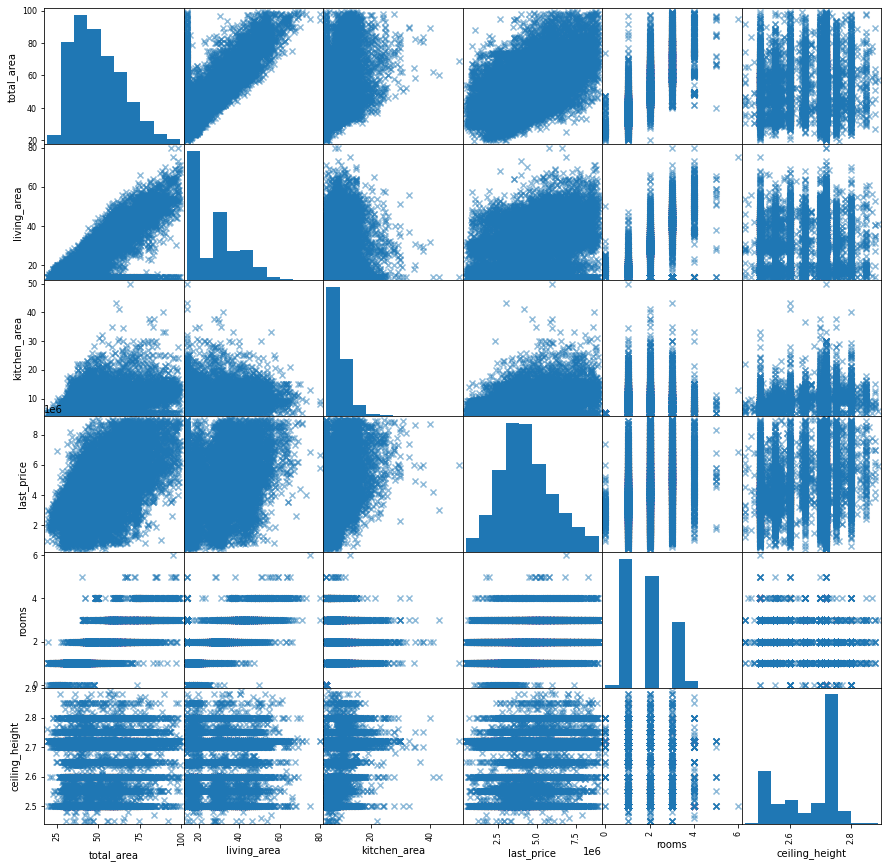

In [74]:
pd.plotting.scatter_matrix(analysis_2, figsize=(15, 15), marker="x") 
plt.show()

На графиках можно увидеть взаимосвязь между параметрами квартиры, а так же заметить группы по зависимостям и кресты- выбросы, на которые мы обращаем внимание при формировании конкретной статистики, но которые не имеют значительного влияния на выводы, полученные на основе основной массы значений.

#### Промежуточный вывод
По результату проведённого анализа площади, цены, числа комнат и высоты потолков, однозначно можно сказать, что подавляющее большинство объявлений о продаже квартир составляют 1-2 комнатные квартиры в ценовом диапазоне 4 млн.руб и высотой потолков в 2,75 метра

#### 4.5 Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану.

Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [75]:
good_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week_exposition,month_exposition,years_exposition,group
1,7,3350000.0,40.4,2018-12-04,1,2.72,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.00,19.0,0,0.0,0,0.0,81.0,82920,1,12,2018,Первый
2,10,5196000.0,56.0,2015-08-20,2,2.72,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.00,14.0,1,90.0,2,574.0,558.0,92785,3,8,2015,Другой
5,10,2890000.0,30.4,2018-09-10,1,2.72,5,14.4,5,False,False,False,9.1,0,городской поселок янино-1,28795.26,14.0,0,0.0,0,0.0,55.0,95065,0,9,2018,Последний
6,6,3700000.0,37.3,2017-11-02,1,2.72,26,14.0,6,False,False,False,14.4,1,поселок парголово,52996.00,19.0,0,0.0,0,0.0,155.0,99195,3,11,2017,Другой
7,5,7915000.0,71.6,2019-04-18,2,2.72,24,14.0,22,False,False,False,18.9,2,санкт-петербург,23982.00,12.0,0,0.0,0,0.0,NaN,110544,3,4,2019,Другой


##### 4.5.1 Диаграмма размаха времени продажи квартиры

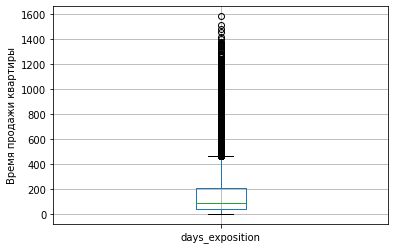

In [76]:
good_data.boxplot('days_exposition')
plt.ylabel('Время продажи квартиры')
plt.show()

##### 4.5.2 Распределение количества продаж по времени

Значение по количеству дней в продаже свыше 250 лучше отсечь, т.к. это редкие квартиры с нестандартной планировкой и такие квартиры могут продаваться очень долго, для статистики они нам не нужны, т.к. сильно меняют сренее значение по сроку продажи квартир.

In [77]:
good_data = good_data.query('days_exposition < 250')
good_data['days_exposition'].agg(['mean','median'])

mean      80.926412
median    60.000000
Name: days_exposition, dtype: float64

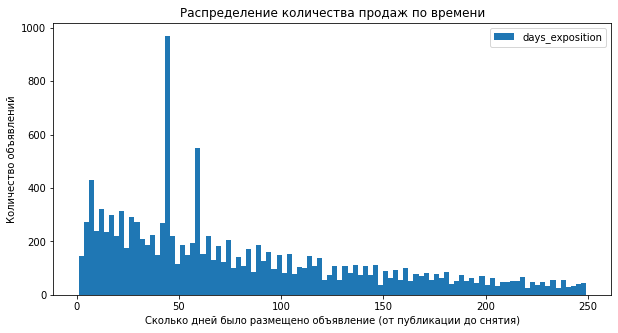

In [78]:
good_data.plot(kind='hist',y='days_exposition',title='Распределение количества продаж по времени', bins=100, figsize=(10,5))

plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()

##### Диаграмма размаха времени продажи квартиры
Повторный просмотр на основе изменения данных

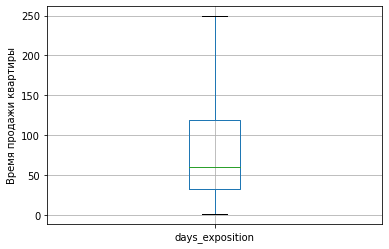

In [79]:
good_data.boxplot('days_exposition')
plt.ylabel('Время продажи квартиры')
plt.show()

##### Вывод:
В среднем продажа среднестатистичекой квартиры чаще всего занимает около двух месяцев, но этот срок может варьироваться между 1-4 месяцами.

##### Зависимость цены от этажа расположения квартиры

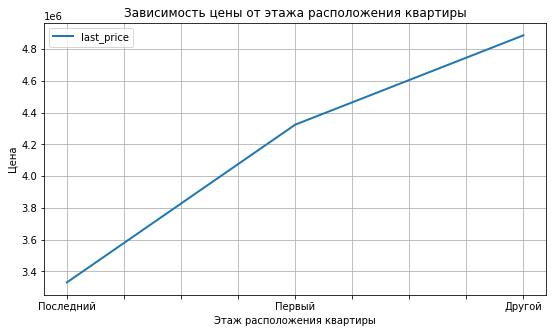

In [80]:
(good_data
     .pivot_table(index='group', values='last_price').sort_values(by='last_price', ascending=True)
     .plot(grid=True, figsize=(9, 5),linewidth=2, title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Цена')
plt.show()

##### График количественного отношения распределения предложений в зависимости от этажа

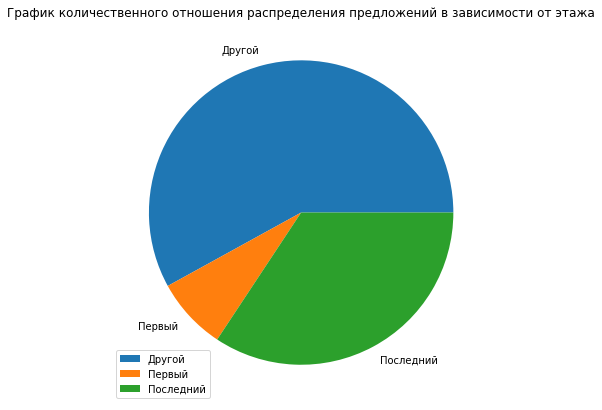

In [81]:
good_data.pivot_table(index='group',values='last_price',aggfunc='count').plot.pie(y='last_price', figsize=(7,7), label='', title='График количественного отношения распределения предложений в зависимости от этажа')
plt.show()

##### Вывод:
Глядя на графики становится очевидно, что ценится любой другой этаж здания кроме первого и последнего, как по цене, так и по количеству предложений на рынке. А так же очевидна зависимость цены от удалённости от центра и площади квартиры, чем квартира больше и ближе к центру, тем цена выше. Чего нельзя однозначно сказать о количестве комнат, здесь график цены меняется не так значительно.

####  Изучим зависимость цены от даты размещения: дня недели, месяца и года.

##### 4.7.1.1 Зависимость цены от месяца размещения

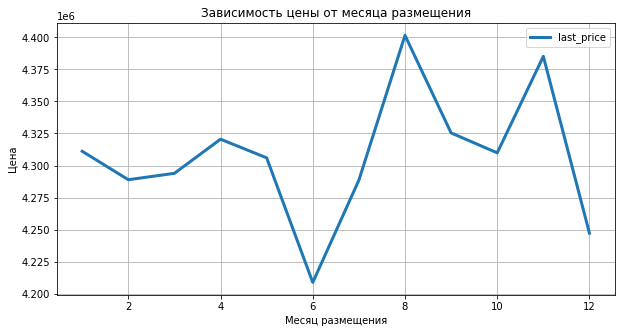

In [82]:
(good_data
    
     .pivot_table(index='month_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3, title='Зависимость цены от месяца размещения')
)
plt.xlabel('Месяц размещения')
plt.ylabel('Цена')

plt.show()

##### 4.7.1.2 Зависимость цены от года размещения

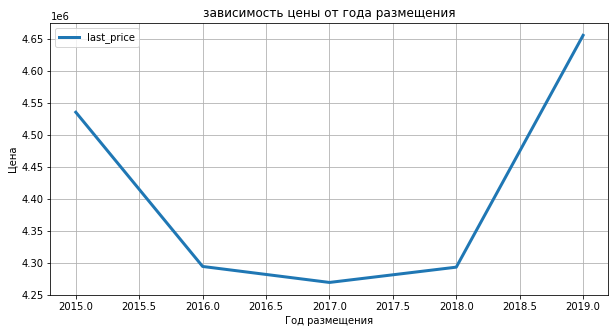

In [83]:
(good_data
    
     .pivot_table(index='years_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='зависимость цены от года размещения')
     
)
plt.xlabel('Год размещения')
plt.ylabel('Цена')

plt.show()

##### Вывод:
На графике помесячного размещения объявлений хорошо просматирваются два падения - это середина и конец года, в эти месяцы лучше квартиры не продавать, т.к. средняя стоимость ранка будет ниже чем в другие месяцы. По годовой тенденции наблюдается падение в стоимости жилья в 2015-2017 годах и резкий взлёт стоимости начиная с 2018 года, что вызвано скорей всего большим спросом на рынке недвижимости.

#### 4.8 Срез 10 населённых пунктов с наибольшим числом объявлений 

In [84]:
data_top_10 = data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
data_top_10.columns=['number_of_ads']
data_top_10

,number_of_ads
locality_name,
санкт-петербург,15721
поселок мурино,556
поселок шушары,440
всеволожск,398
пушкин,369
колпино,338
поселок парголово,327
гатчина,307
деревня кудрово,299


##### Вывод:
Очевидный лидер по количеству объявлений это "Санкт_Петербург", остальные номинанты ТОП-10 расположены по области города примерно с равным количеством объявлений.

##### 4.8.1 Посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [85]:
data_top_10['cost_per_meter_mean'] = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc='mean')
data_top_10_s=data_top_10.style.format({'cost_per_meter_mean':'{:.2f} ₽'})
data_top_10_s

,number_of_ads,cost_per_meter_mean
locality_name,,
санкт-петербург,15721,114578.34 ₽
поселок мурино,556,84848.38 ₽
поселок шушары,440,78506.27 ₽
всеволожск,398,68304.86 ₽
пушкин,369,102964.87 ₽
колпино,338,75364.91 ₽
поселок парголово,327,90038.06 ₽
гатчина,307,68424.64 ₽
деревня кудрово,299,92109.38 ₽


##### Вывод:
По средней стоимости за квадратный метр жилья можно сказать, что низкое количество объявлений не сильно влияет на цену кв.метра, так например Пушкин и посёлок Парголово имеют практически ту же цену в 100 т.р. за кв. метр как и жил.площадь в Санкт-Петербурге.

##### 4.8.2 Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [86]:
(data_top_10_s
 .highlight_max(color='yellowgreen', subset='cost_per_meter_mean')
 .highlight_min(color='coral', subset='cost_per_meter_mean')
)

,number_of_ads,cost_per_meter_mean
locality_name,,
санкт-петербург,15721,114578.34 ₽
поселок мурино,556,84848.38 ₽
поселок шушары,440,78506.27 ₽
всеволожск,398,68304.86 ₽
пушкин,369,102964.87 ₽
колпино,338,75364.91 ₽
поселок парголово,327,90038.06 ₽
гатчина,307,68424.64 ₽
деревня кудрово,299,92109.38 ₽


##### 4.8.2.1 Населённые пункты с самой высокой и низкой стоимостью жилья

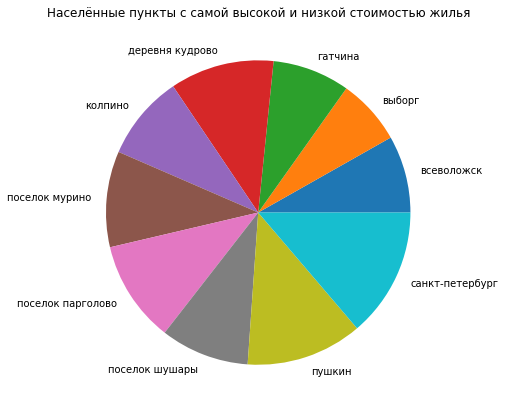

In [87]:
data_top_10.pivot_table(index='locality_name',values='cost_per_meter_mean').plot.pie(y='cost_per_meter_mean', figsize=(7,7), legend=False, label='', title='Населённые пункты с самой высокой и низкой стоимостью жилья')
plt.show()

##### Вывод:
Самая низкая стоимость жилья из нашей ТОП-10 расположена в Выборге и Всеволожске, а на первом месте расположился Санкт-Петребург, с незначительным отрывом от Пушкина

#### 4.9 Изучим предложения квартир: выделим квартиры в Санкт-Петербурге ('locality_name'). Выясним, какая область входит в центр.

In [88]:
local_spb = data.loc[data['locality_name'] == 'санкт-петербург']
local_spb['cityCenters_nearest'].isna().sum()

0

Создадим столбец с расстоянием до центра в километрах и округлим их до целых значений.

In [89]:
local_spb['city_centers_nearest_km']=(local_spb['cityCenters_nearest']/1000).round(3)
local_spb['city_centers_nearest_km']

/tmp/ipykernel_436/1510721484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local_spb['city_centers_nearest_km']=(local_spb['cityCenters_nearest']/1000).round(3)


0        0.016
2        0.014
3        0.007
4        0.008
7        0.012
         ...  
23689    0.016
23690    0.006
23691    0.004
23694    0.004
23697    0.010
Name: city_centers_nearest_km, Length: 15721, dtype: float64

##### 4.9.1 Диаграмма размаха удалённости от центра

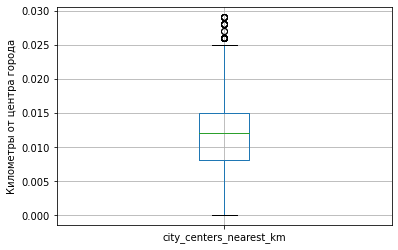

In [90]:
local_spb.boxplot('city_centers_nearest_km')

plt.ylabel('Километры от центра города')
plt.show()

##### 4.9.2 Посчитаем среднюю цену для каждого километра

Очевидно, что город Санкт-Петрбург очень большой, но даже для него расстояние больше 24 км от центра не может считаться центром города, по-этому мы отсекли мешающие статисткие и анализу данные

In [91]:

local_spb = local_spb.loc[local_spb['city_centers_nearest_km'] < 24]
local_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week_exposition,month_exposition,years_exposition,group,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16.0,1,482.0,2,755.0,NaN,120370,3,3,2019,Другой,0.016
2,10,5196000.0,56.0,2015-08-20,2,2.72,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,14.0,1,90.0,2,574.0,558.0,92785,3,8,2015,Другой,0.014
3,0,64900000.0,159.0,2015-07-24,3,2.72,14,14.0,9,False,False,False,5.0,0,санкт-петербург,28098.0,7.0,2,84.0,3,234.0,424.0,408176,4,7,2015,Другой,0.007
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8.0,2,112.0,1,48.0,121.0,100000,1,6,2018,Другой,0.008
7,5,7915000.0,71.6,2019-04-18,2,2.72,24,14.0,22,False,False,False,18.9,2,санкт-петербург,23982.0,12.0,0,0.0,0,0.0,NaN,110544,3,4,2019,Другой,0.012


In [92]:
mean_cost_per_km = (local_spb['last_price'].sum()/local_spb['city_centers_nearest_km'].sum())/1000
print('Средняя цена для каждого километра составляет {:.0f} ₽'.format(mean_cost_per_km))

Средняя цена для каждого километра составляет 694722 ₽


##### 4.9.3 График зависимости цены от удаленности от центра города

Построим график: он будет показывать, как цена зависит от удалённости от центра. А так же определим границу центральной зоны.

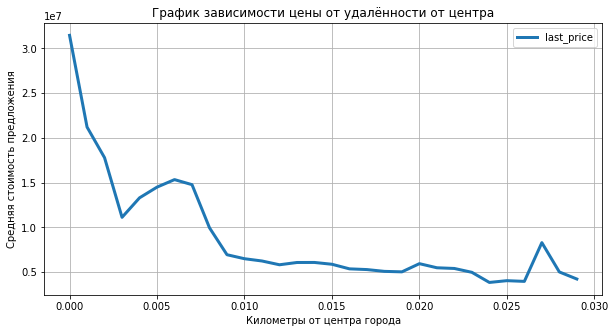

In [93]:
local_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').plot(figsize=(10,5), grid=True, linewidth=3, title='График зависимости цены от удалённости от центра')
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость предложения')
plt.show()

Очевидно, что падение цены на графике сильно изменилось при достижении значения в 9-10 км, это говорит нам, что центральным районом можно считать все квартиры в удалении от центра не более чем на 10 км.

### Часть 5. Общий вывод

Подводя итог проделанной работы по подготовке данных к анализу мы столкнулись с большим количеством пропусков в колонках, которые могут влиять как на среднюю цену предлодения квартир на рынке, так и на анализ выделенных групп в частности. Тем не менее какие-то данные мы заполнили средним значением дабы не терять основной массив статистичесих данных, некоторые заполнили на основе группировки, хотя и остались данные без изменений с пропущенными значениями. 

По результату проделанной работы по обработке и анализу недостающих и "битых" данных, несомненно надо обратить внимание коллег по подготовке и сбору данных на заполняемость ячеек, либо на крректность выгрузки данных из программы. Ошибок связанных с человеческим фактором(опечаток и пр.) довольно мало, что сильно облегчило труд по предобработке материала для анализа.

После избавления нашей базы от 'мусорных' и выбивающихся значений мы выполнили такие операции как подсчёт средней стоимости квадратного метра жилья, стоимость каждого километра удаления от центра, выделили сегмент квартир расположенных в центре и проанализировали их параметры, а так же вывели статистику по скорости продажи объявления с даты его размещения, факторы влияющие на это и проанализировали статистику продаж в зависимости от периода размещения объявления.

Для большей наглядности при анализе использовались графики, из которых лего можно сделать вывод о том, что лидером по размещению объявлений о продаже недвижимости является "Санкт-Петербург", несмотря на это средняя цена квадратного метра приблизительно такая же как и по области. 

Тенденция рынка такова, что начиная с 2017 года активно растёт спрос на жильё за пределами центра Петербурга, при этом люди в основной своей массе стараются найти предложения квартир на любом этаже за исключением первого и последнего, за частую это высотные здания и новостройки.

В сухом остатке в большинстве случаев покупки жилья люди выбирают 1-2 комнатные квартиры в высотной новостройке по периметру города Санкт-Петребург, с средней стоимостью в 100 т.р. за кв.метр. и высотой потолков 2,75. 

Таким образом можно сделать вывод о том, что количество таких домов и соответственно предложений будет расти в след за ценой.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [х]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [х]  определены пропущенные значения
- [х]  заполнены пропущенные значения там, где это возможно
- [х]  есть пояснение, какие пропущенные значения обнаружены
- [х]  изменены типы данных
- [х]  есть пояснение, в каких столбцах изменены типы и почему
- [х]  устранены неявные дубликаты в названиях населённых пунктов
- [х]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [х]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [х]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [х]  посчитано и добавлено в таблицу: месяц публикации объявления
- [х]  посчитано и добавлено в таблицу: год публикации объявления
- [х]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [х]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [х]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [х]  построены гистограммы для каждого параметра
- [х]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [х]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [х]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [х]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [х]  в каждом этапе есть промежуточные выводы
- [х]  есть общий вывод